# Project: Coffee Sales

<img src="https://torange.biz/photofxnew/198/IMAGE/background-responsive-design-template-sale-letters-sales-promotion-3d-gold-198499.jpg" width="300" height="200">

</br>

# Description:
### In this project, we will analyse the coffee sales data we have. In that, we will see the trends, distribution, and relationship of various factor with sales. Furthermore, we will tarin a Machine Learning model, which will give future prediction.

# Workflow

### This project is divided into two core parts: </br> </br>

<h3>
1. Data Analysis  </br>
  i. Univariate analysis: Histogram, Line plot, Box plot, Pie chart </br>
  ii. Bivariate analysis: Scatter plot, Bar plot </br>
  iii. Multivariate analysis: Heatmap, Pair plot </br>
</h3> </br>

<h3>
2. Data Science (Machine Learning) </br>
  i. Modelling and Prediction </br>
</h3> </br>

<h3><b><u>Dataset Link:</u></b> <a href="https://drive.google.com/file/d/1YqP5Na7_o2xBwsFcf-0NTK31u5_EpxKC/view?usp=sharing" target="_blank">Click here to view the dataset</a></h3> </br>

<h3> Dataset description: </br>
This dataset seems to represent transaction data from a coffee shop. It includes records of sales, with details such as the date and time of each transaction, the payment method (card), the transaction amount, and the type of coffee sold. Each row corresponds to a (unique) transaction, and the customer is identified by a unique card number. From this data, insights into customer preferences and sales trends over time for different coffee types, like Latte, Hot Chocolate, Americano, and others can be made. </h3>

# Data Preparation (Data Loading & Preprocessing)

* Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Loading the data

In [ ]:
# URL to the Google Drive file
file_url = 'https://drive.google.com/uc?export=download&id=1YqP5Na7_o2xBwsFcf-0NTK31u5_EpxKC'

# Load data into a pandas dataframe
data = pd.read_csv(file_url)

In [ ]:
# Display the first few rows of the data
display(data.head())

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


# Data Analysis

* Analysing dataset

In [ ]:
# No. of Rows & Columns
print(data.shape)

(1133, 6)


In [ ]:
# Columns
print(data.columns)

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')


In [ ]:
# Data type of columns
print(data.dtypes)

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object


In [ ]:
# Statistics of the daTa
print(data.describe())

             money
count  1133.000000
mean     33.105808
std       5.035366
min      18.120000
25%      28.900000
50%      32.820000
75%      37.720000
max      40.000000


In [ ]:
# Description of the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB
None


In [ ]:
# Null values
print(data.isnull().sum())

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


We have around 89 null values in card column

In [ ]:
# Checking whether date and datetime have value = zero?
print((data['date'] == 0).sum())

print((data['datetime'] == 0).sum())

0
0


The above step confirms there are perhaps no null values in any form

We will replace nan values in card column with Unknown. Dropping card column is not a good option as it can be used in checking customer frequencies.

In [ ]:
# Replacing nan in card column with Unknown
data['card'].fillna('Unknown', inplace=True)

<ipython-input-17-30512f5a37ea>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['card'].fillna('Unknown', inplace=True)


In [ ]:
# Checking null values again
print(data.isnull().sum())

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64


In [ ]:
# Checking unique values, no. of unique values, value counts of each column using a function.
def unique_col(df):
    for col in df.columns:
        if df[col].dtypes=='object':
            print(f'{col} has {df[col].nunique()} unique values \n')
            print(df[col].value_counts())
            print('-'*50)

In [ ]:
unique_col(data)

date has 150 unique values 

date
2024-07-30    24
2024-07-31    22
2024-05-20    17
2024-05-23    16
2024-07-26    16
              ..
2024-07-04     2
2024-04-27     1
2024-05-08     1
2024-07-15     1
2024-07-17     1
Name: count, Length: 150, dtype: int64
--------------------------------------------------
datetime has 1133 unique values 

datetime
2024-07-31 21:55:16.570    1
2024-03-01 10:15:50.520    1
2024-03-01 12:19:22.539    1
2024-03-01 12:20:18.089    1
2024-03-01 13:46:33.006    1
                          ..
2024-03-02 17:34:54.969    1
2024-03-02 16:37:24.475    1
2024-03-02 14:38:35.535    1
2024-03-02 11:59:45.484    1
2024-03-02 10:41:41.249    1
Name: count, Length: 1133, dtype: int64
--------------------------------------------------
cash_type has 2 unique values 

cash_type
card    1044
cash      89
Name: count, dtype: int64
--------------------------------------------------
card has 447 unique values 

card
Unknown                89
ANON-0000-0000-0012    88
ANON-

Data is not normally distributed in many case

In [ ]:
# Plotting value count for each column using function
def value_count(df):
    for col in df.columns:
        if df[col].dtypes=='object':
          if df[col].nunique()<10:
            plt.figure(figsize=(15,7))
          else:
            plt.figure(figsize=(20,30))

          df[col].value_counts().plot(kind='barh')
          plt.title(f'Value Counts of {col}')
          plt.xlabel('Counts')
          plt.ylabel(col)
          plt.yticks(rotation=0)
          plt.show()
          print('\n')
          print('-'*50)

In [ ]:
value_count(data)

Output hidden; open in https://colab.research.google.com to view.

Lets consider top 3 frequent customer. This can help in personalized discounts and offers, with taregt marketing. Its harder to keep a loyal customer than to attract new ones.

In [ ]:
# Top three frequent customers
data['card'].value_counts().head(3)

,count
card,
Unknown,89
ANON-0000-0000-0012,88
ANON-0000-0000-0009,63


Unknown is something we introduce. But, the below two are frequent customers.

* Univariate analysis


In [ ]:
# Columns
print(data.columns)

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')


In [ ]:
# Prettier plot
sns.set(style="whitegrid")

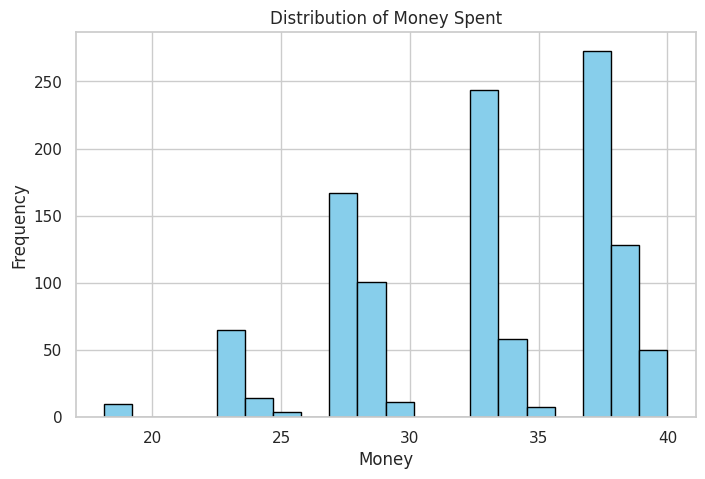

In [ ]:
# Histogram, Line plot, Box plot, Pie chart

# Histogram
plt.figure(figsize=(8, 5))
plt.hist(data['money'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Money Spent')
plt.xlabel('Money')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Ensure date is in datetime format
data['date'] = pd.to_datetime(data['date'])

display(data.head())

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


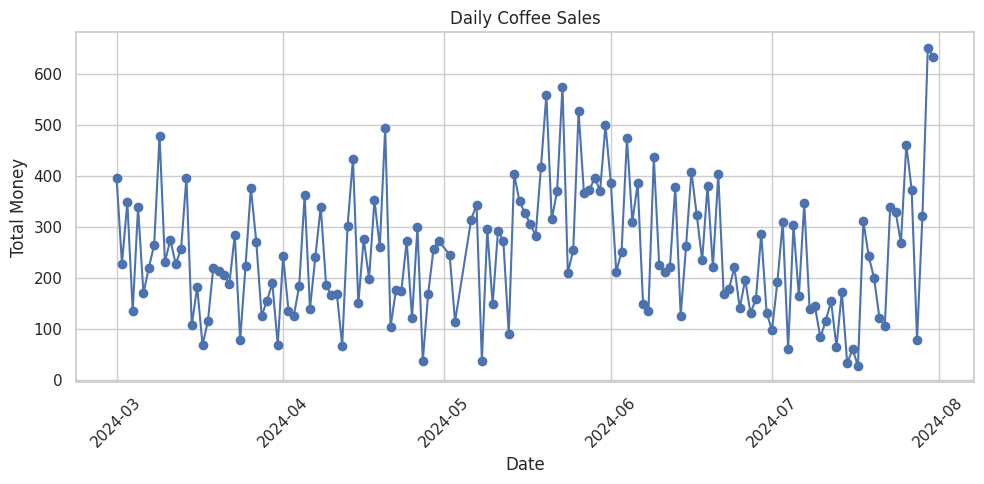

In [ ]:
# Line plot
# Group by date and sum money
daily_sales = data.groupby('date')['money'].sum()

plt.figure(figsize=(10, 5))
plt.plot(daily_sales.index, daily_sales.values, marker='o')
plt.title('Daily Coffee Sales')
plt.xlabel('Date')
plt.ylabel('Total Money')
plt.xticks(rotation=45)t
plt.tight_layout()
plt.show()

As we can see that we have five months of data, which won't be good for ML prediction.

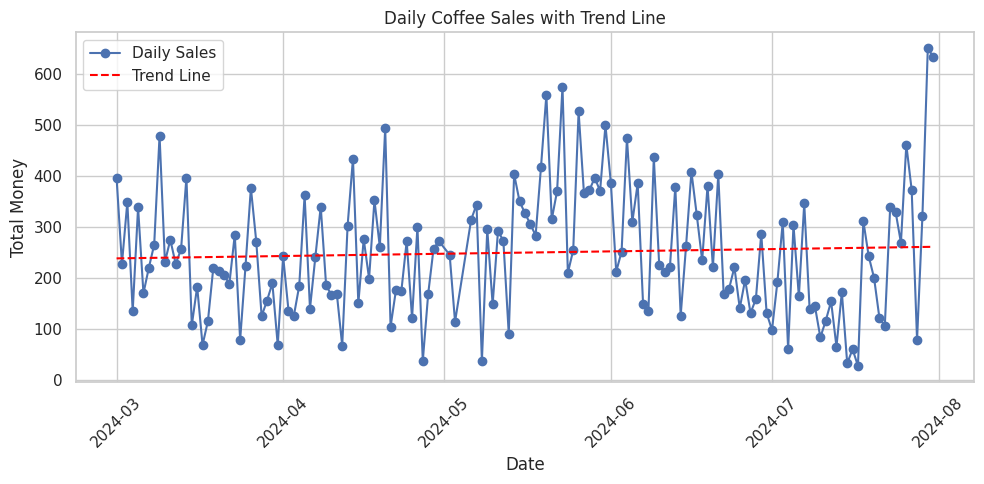

In [ ]:
# Trend line
# Group by date and sum money
daily_sales = data.groupby('date')['money'].sum()

# Convert dates to ordinal for linear regression
x = daily_sales.index.map(pd.to_datetime).map(lambda date: date.toordinal())
y = daily_sales.values

# Fit a straight line (degree 1 polynomial)
slope, intercept = np.polyfit(x, y, 1)
trend_line = slope * x + intercept

# Plot original data
plt.figure(figsize=(10, 5))
plt.plot(daily_sales.index, y, marker='o', label='Daily Sales')

# Plot trend line
plt.plot(daily_sales.index, trend_line, color='red', linestyle='--', label='Trend Line')

plt.title('Daily Coffee Sales with Trend Line')
plt.xlabel('Date')
plt.ylabel('Total Money')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


May be single year insufficient data caused a plain trend (
  plateau).

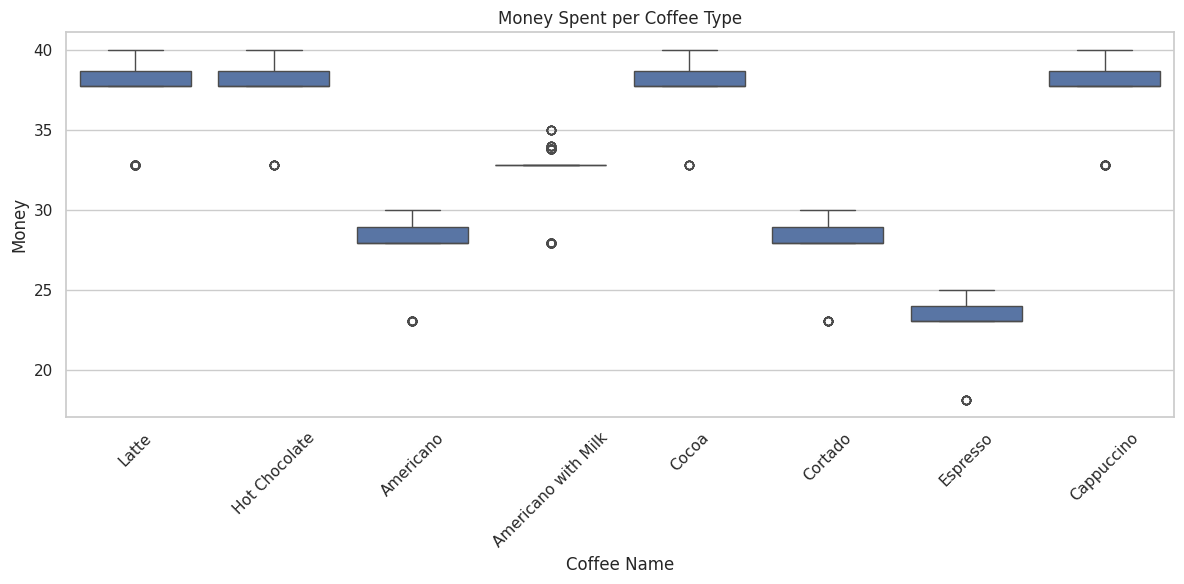

In [ ]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='coffee_name', y='money', data=data)
plt.title('Money Spent per Coffee Type')
plt.xlabel('Coffee Name')
plt.ylabel('Money')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

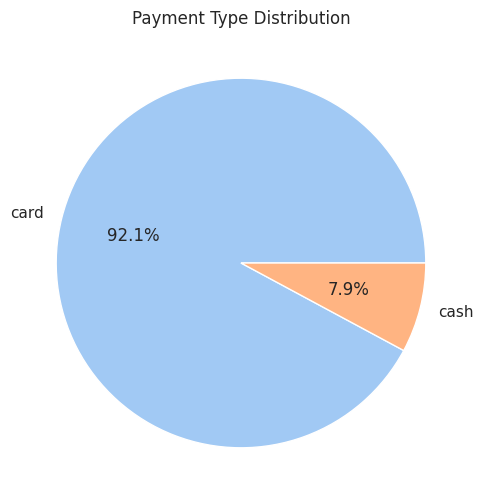

In [ ]:
# Pie plot
cash_counts = data['cash_type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(cash_counts, labels=cash_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Payment Type Distribution')
plt.show()

* Bivariate analysis

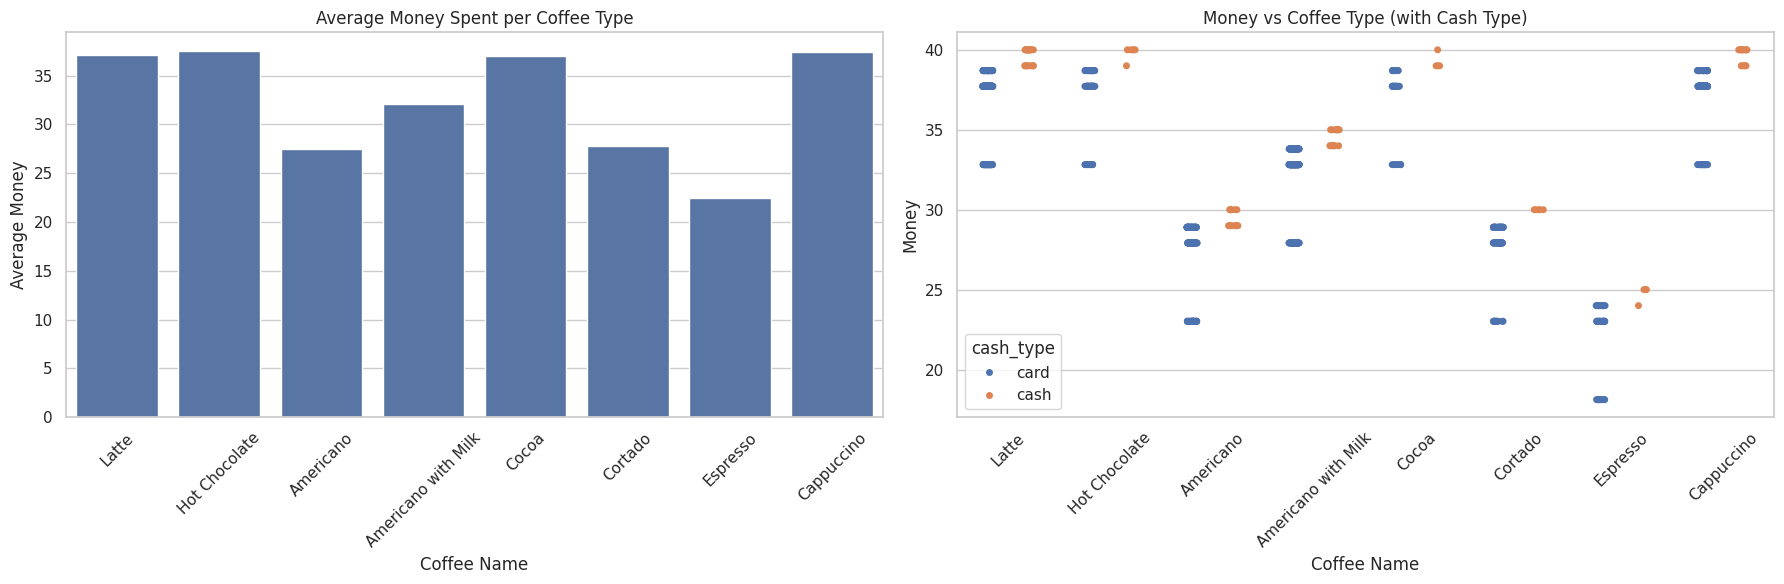

In [ ]:
# Set figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- BAR PLOT ---
sns.barplot(x='coffee_name', y='money', data=data, ax=axes[0], estimator='mean', errorbar=None)
axes[0].set_title('Average Money Spent per Coffee Type')
axes[0].set_xlabel('Coffee Name')
axes[0].set_ylabel('Average Money')
axes[0].tick_params(axis='x', rotation=45)

# --- SCATTER PLOT ---
sns.stripplot(x='coffee_name', y='money', data=data, ax=axes[1], jitter=True, hue='cash_type', dodge=True)
axes[1].set_title('Money vs Coffee Type (with Cash Type)')
axes[1].set_xlabel('Coffee Name')
axes[1].set_ylabel('Money')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

*Insights we gain from above plot:* </br>

<b>Variation in price for each coffee type —</b> Are all Lattes priced the same? Or are there outliers? As we can see that the latte in our dataset have different price. Based on our box plot and scatter plot, we can say that there presents some outliers. </br>

<b>Clustering —</b> Are some coffee types always bought with a card vs. cash? Both options are preferred by customers. But perhaps, most customers of Cortado preferred card payment.

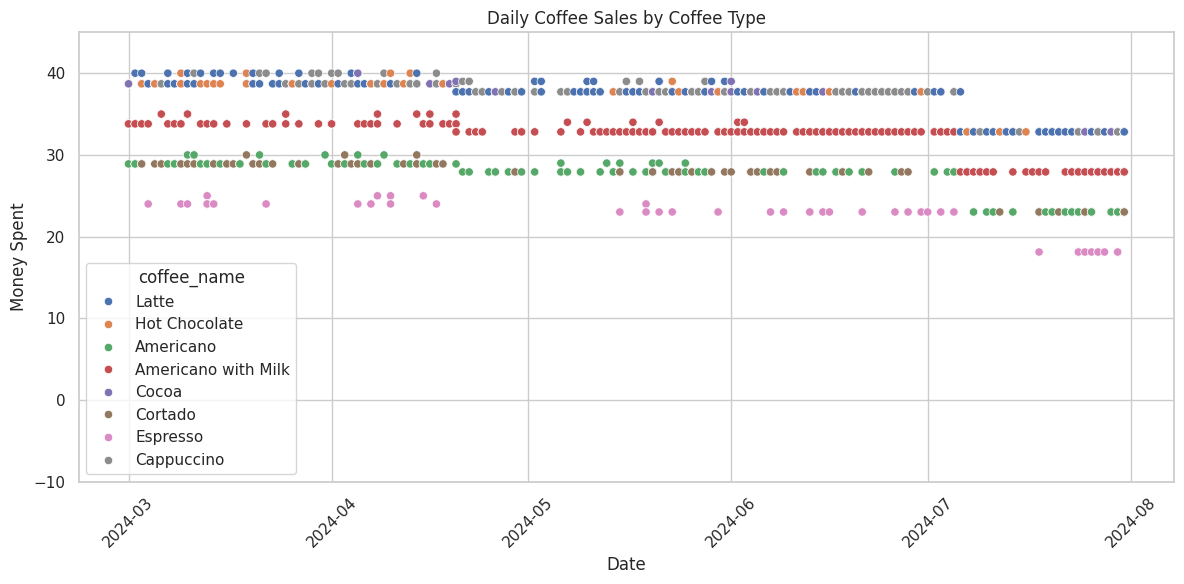

In [ ]:
# Scatter plot against date
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='money', hue='coffee_name', data=data)
plt.title('Daily Coffee Sales by Coffee Type')
plt.xlabel('Date')
plt.ylabel('Money Spent')
plt.xticks(rotation=45)
plt.ylim(-10, 45)
plt.tight_layout()
plt.show()

*Points from above plots* </br>

* It is seen that mostly Americano with Milk is bought, almost every day in the past 5 months. Making sure that this product ingredient should not be out of stock.
* Cocoa perhaps was sold almost negligible, which indicates that purchasing more cocoa is not much beneficial.  

* Multivariate analysis

<Axes: >

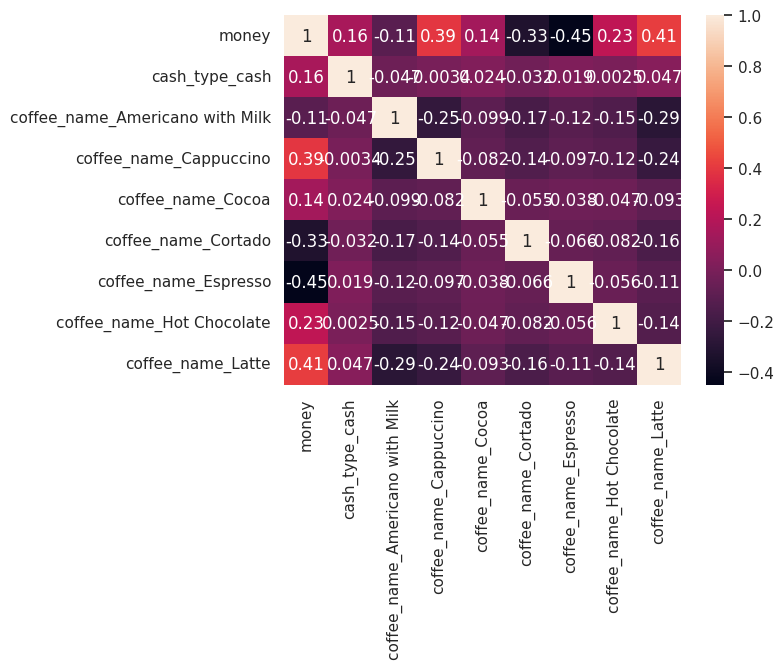

In [ ]:
# Create dummy correlations (if needed, like encoding)
# Example if you encode 'cash_type' or more for a richer heatmap:
data_encoded = pd.get_dummies(data[['money', 'cash_type', 'coffee_name']], drop_first=True)
sns.heatmap(data_encoded.corr(), annot=True)

In [ ]:
data_encoded.corr()

,money,cash_type_cash,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
money,1.000000,0.156161,-0.111588,0.391482,0.139090,-0.330611,-0.449631,0.233255,0.412034
cash_type_cash,0.156161,1.000000,-0.046721,-0.003437,0.023713,-0.032258,0.018562,0.002484,0.047250
coffee_name_Americano with Milk,-0.111588,-0.046721,1.000000,-0.254576,-0.099378,-0.172233,-0.118343,-0.147139,-0.290849
coffee_name_Cappuccino,0.391482,-0.003437,-0.254576,1.000000,-0.081657,-0.141519,-0.097239,-0.120900,-0.238983
coffee_name_Cocoa,0.139090,0.023713,-0.099378,-0.081657,1.000000,-0.055245,-0.037959,-0.047196,-0.093291
coffee_name_Cortado,-0.330611,-0.032258,-0.172233,-0.141519,-0.055245,1.000000,-0.065787,-0.081795,-0.161683
coffee_name_Espresso,-0.449631,0.018562,-0.118343,-0.097239,-0.037959,-0.065787,1.000000,-0.056202,-0.111094
coffee_name_Hot Chocolate,0.233255,0.002484,-0.147139,-0.120900,-0.047196,-0.081795,-0.056202,1.000000,-0.138126
coffee_name_Latte,0.412034,0.047250,-0.290849,-0.238983,-0.093291,-0.161683,-0.111094,-0.138126,1.000000


| Feature                           | Correlation with `money` | Meaning                                                        |
| --------------------------------- | ------------------------ | -------------------------------------------------------------- |
| `coffee_name_Latte`               | **+0.41**                | Lattes are usually **high-value purchases**.                   |
| `coffee_name_Cappuccino`          | **+0.39**                | Similar — Cappuccinos are associated with **higher spending**. |
| `coffee_name_Hot Chocolate`       | +0.23                    | Mildly positively associated with higher money spent.          |
| `coffee_name_Cocoa`               | +0.14                    | Slightly positive.                                             |
| `coffee_name_Cortado`             | **–0.33**                | Cortado purchases are usually **lower-value**.                 |
| `coffee_name_Espresso`            | **–0.45**                | Strong negative — likely one of the **cheapest items**.        |
| `coffee_name_Americano with Milk` | –0.11                    | Slightly lower-value.                                          |


*Insight Summary from above graph* </br> </br>

* Coffee Types and Spending </br>
High spenders: Latte, Cappuccino </br>
Low spenders: Espresso, Cortado </br> </br>

* Customer Behavior
People spending more money are more likely buying premium coffees (milk-based or specialty).
cash_type doesn't drastically affect money, but there's a small positive association. </br> </br>

* Correlation Between Coffee Types
Since we had one-hot encoded the data, we encountered negative correlation between different coffees — because one row can only have one coffee.

*How to Use These Insights?* </br>

* Tailor pricing strategies (e.g. we can perhaps upsell milk-based drinks).
* Target marketing for higher-profit drinks.
* Detect which products lead to bigger bills.
* Understand that Espresso = volume, Latte = margin.

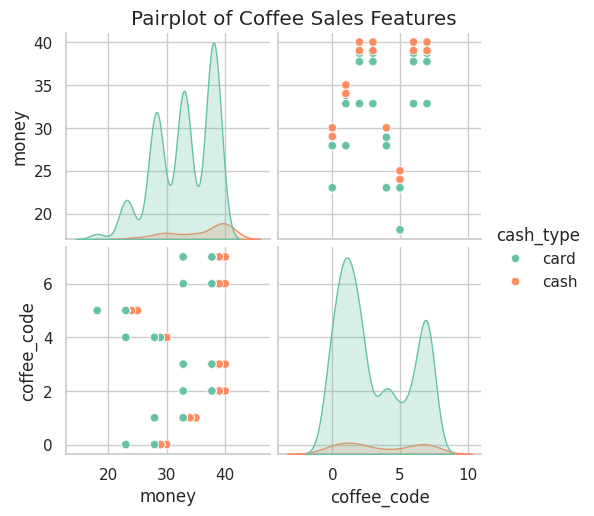

In [ ]:
# Pair plot

# Categorical labels
data['coffee_code'] = data['coffee_name'].astype('category').cat.codes

# Select useful columns
plot_data = data[['money', 'coffee_code', 'cash_type']]

sns.pairplot(plot_data, hue='cash_type', palette='Set2')
plt.suptitle('Pairplot of Coffee Sales Features', y=1.02)
plt.show()

Card seems prominent for cheap coffee buying.

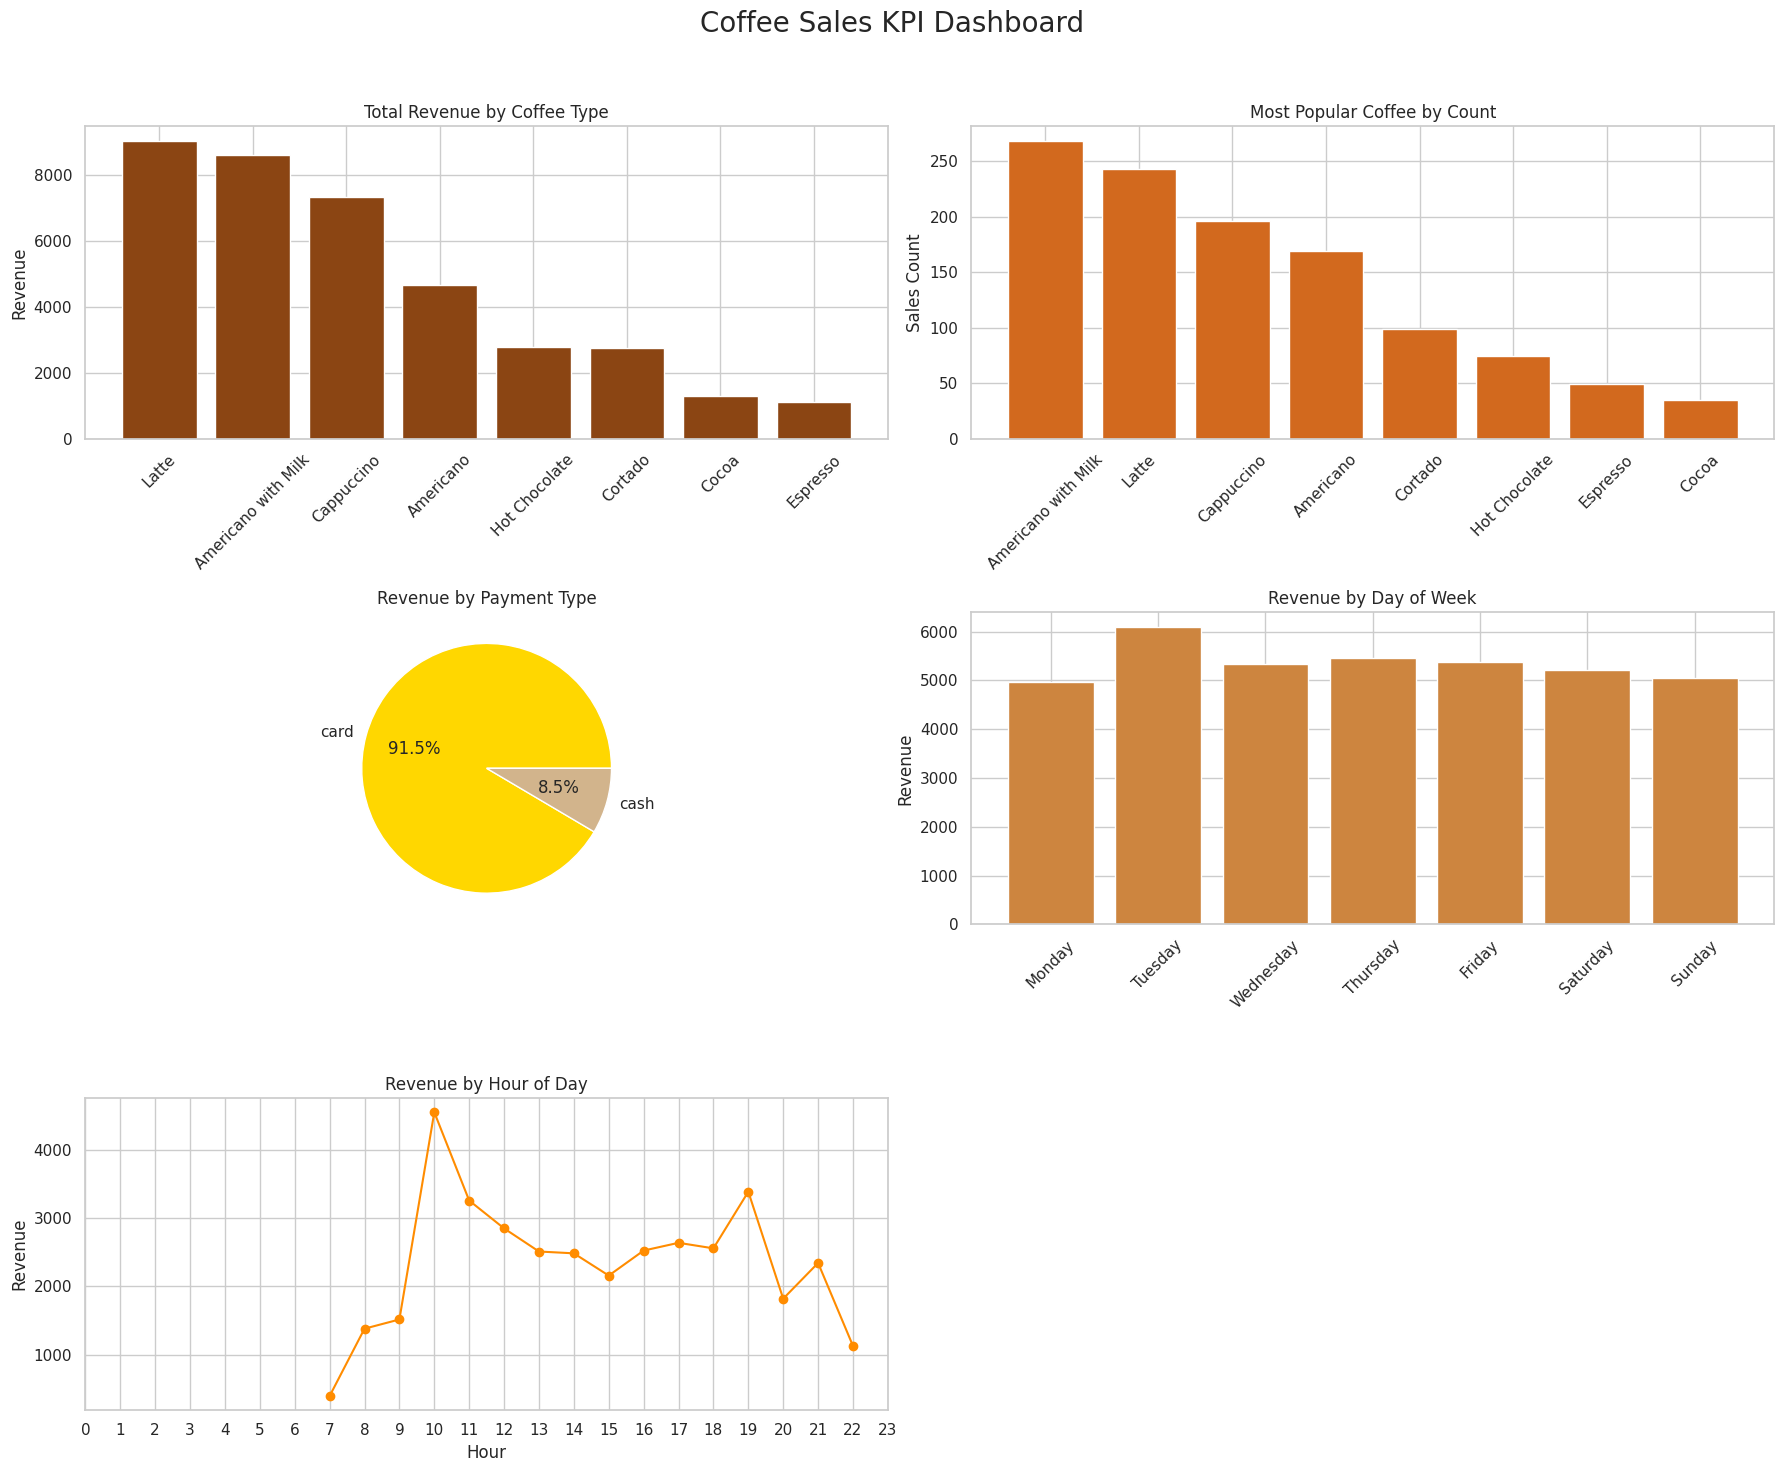

In [ ]:
# Giant Analysis -- Cred: Assisted by AI
# Ensure datetime and new columns exist
data['datetime'] = pd.to_datetime(data['datetime'])
data['date'] = pd.to_datetime(data['date'])
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.day_name()

# Preprocessing KPIs
revenue_by_coffee = data.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
popular_coffee = data['coffee_name'].value_counts()
revenue_by_payment = data.groupby('cash_type')['money'].sum()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_day = data.groupby('day_of_week')['money'].sum().reindex(day_order)
revenue_by_hour = data.groupby('hour')['money'].sum()

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Coffee Sales KPI Dashboard', fontsize=20)

# 1. Revenue by Coffee Type
axes[0, 0].bar(revenue_by_coffee.index, revenue_by_coffee.values, color='saddlebrown')
axes[0, 0].set_title('Total Revenue by Coffee Type')
axes[0, 0].set_ylabel('Revenue')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Popular Coffee by Count
axes[0, 1].bar(popular_coffee.index, popular_coffee.values, color='chocolate')
axes[0, 1].set_title('Most Popular Coffee by Count')
axes[0, 1].set_ylabel('Sales Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Revenue by Payment Type (Pie)
axes[1, 0].pie(revenue_by_payment, labels=revenue_by_payment.index, autopct='%1.1f%%', colors=['gold', 'tan'])
axes[1, 0].set_title('Revenue by Payment Type')

# 4. Revenue by Day of Week
axes[1, 1].bar(revenue_by_day.index, revenue_by_day.values, color='peru')
axes[1, 1].set_title('Revenue by Day of Week')
axes[1, 1].set_ylabel('Revenue')
axes[1, 1].tick_params(axis='x', rotation=45)

# 5. Revenue by Hour of Day
axes[2, 0].plot(revenue_by_hour.index, revenue_by_hour.values, marker='o', color='darkorange')
axes[2, 0].set_title('Revenue by Hour of Day')
axes[2, 0].set_xlabel('Hour')
axes[2, 0].set_ylabel('Revenue')
axes[2, 0].grid(True)
axes[2, 0].set_xticks(range(0, 24))

# Hide unused subplot
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

10:00 AM seems many people purchase time. This may be due to the reason that people prefer coffee or similar drinks in breakfast (morning) more.

# Machine Learning

*We wil cover price prediction next:* </br> </br>

| Prediction Task                      | Target Variable | Use Case                                                       |
| ------------------------------------ | --------------- | -------------------------------------------------------------- |
| **Price Prediction**              | `money`         | Estimate sale value based on coffee type, time, payment method |


* Price prediction

In [ ]:
# Importing Libraries
from sklearn.model_selection import train_test_split # Spliiting data
from sklearn.preprocessing import OneHotEncoder # One Hot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression # Model
from sklearn.metrics import mean_squared_error, r2_score # Evaluation
import numpy as np

In [ ]:
# Feature engineering
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.day_name()

In [ ]:
# Select features and target
features = ['coffee_name', 'cash_type', 'hour', 'day_of_week']
X = data[features]
y = data['money']

In [ ]:
# Feature
X.values

array([['Latte', 'card', 10, 'Friday'],
       ['Hot Chocolate', 'card', 12, 'Friday'],
       ['Hot Chocolate', 'card', 12, 'Friday'],
       ...,
       ['Latte', 'card', 21, 'Wednesday'],
       ['Latte', 'card', 21, 'Wednesday'],
       ['Latte', 'card', 21, 'Wednesday']], dtype=object)

In [ ]:
# Target
y.values

array([38.7 , 38.7 , 38.7 , ..., 32.82, 32.82, 32.82])

In [ ]:
# Pipeline -- Cred: AI Assisted
# Column transformer for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['coffee_name', 'cash_type', 'day_of_week'])
    ],
    remainder='passthrough'  # Keep 'hour'
)

# Pipeline with preprocessing + model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [ ]:
# Predicted VS. Real
display(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head())

,Actual,Predicted
783,37.72,37.358195
898,37.72,37.405602
413,37.72,37.161429
467,27.92,26.644262
745,27.92,27.450022


Prediction seems quite good. Let's evaluate.

In [ ]:
# Evaluate
# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

RMSE: 1.84
R² Score: 0.82


R2 score depicts that the model is able to demonstrate the reslationship between feature and target. In other words, the model is able to explain the target well when model is trained.

| Prediction Task                      | Target Variable | Use Case                                                       |
| ------------------------------------ | --------------- | -------------------------------------------------------------- |
| 1. **Coffee Recommendation**         | `coffee_name`   | Predict what coffee is likely to be bought next                |
| 2. **Payment Method Classification** | `cash_type`     | Predict if a customer will pay by cash or card                 |

<b> PLEASE MAKE A NOTE THAT THE ABOVE TWO TASKS ARE FUTURE SCOPE IN MY OPINION. WE CAN'T DO TASK THREE AS WE HAVE LIMITED DATA WHICH IS IMBALANCED CONTAINING ALMOST DATA TO BE FALL UNDER CARD PAYMENT.</b>

## Conclusion

In this coffee sales project, we performed a comprehensive data analysis and machine learning workflow using transaction-level data from a coffee shop. The steps and findings are summarized below:

### Data Analysis Highlights

* Conducted univariate, bivariate, and multivariate analyses using histograms, scatter plots, heatmaps, and pair plots.
* Identified top-selling coffee types (e.g., Latte, Hot Chocolate) and examined sales patterns across days of the week, hours of the day, and payment methods.
* Developed a KPI dashboard using matplotlib to visualize key revenue trends and customer behavior.

### Machine Learning Insights

* Built a Linear Regression model to predict the transaction amount (`money`) based on features such as coffee type, time of sale, and payment method.
* The model demonstrated strong performance:

  * RMSE: 1.84, indicating a low average prediction error
  * R² Score: 0.82, meaning the model explains 82% of the variance in transaction amounts.

## References

1. Report provided by Unified Mentor
2. [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
3. GeeksforGeeks (GFG)
4. OpenAI ChatGPT (used for code generation, analysis guidance, and documentation support)


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
!git config --global user.email "khanumerkus@gmail.com"
!git config --global user.name "UmerSalimKhan"

In [21]:
!git clone https://github.com/UmerSalimKhan/Coffee-Sales-Analysis-Machine-Learning.git

Cloning into 'Coffee-Sales-Analysis-Machine-Learning'...


In [22]:
%cd "Coffee-Sales-Analysis-Machine-Learning"

/content/Coffee-Sales-Analysis-Machine-Learning


In [ ]:
!cp /content/drive/MyDrive/Colab Notebooks/Coffee_Sales_Data_Analyst_Internship_Unified_Mentor_Project.ipynb /content/YOUR_REPO/

In [1]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [2]:
!git add README.md

fatal: pathspec 'README.md' did not match any files


In [18]:
!git unconfig --global user.email "khanumerkus@gmail.com"

git: 'unconfig' is not a git command. See 'git --help'.


In [17]:
!git config --global user.email

khanumerkus@gmail.com


In [6]:
!git config --global user.name "UmerSalimKhan"

In [7]:
!git commit -m "Initial commit"

On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)


In [11]:
!git branch -M main

In [12]:
!git remote add origin https://github.com/UmerSalimKhan/Coffee-Sales-Analysis-Machine-Learning.git

error: remote origin already exists.


In [13]:
!git push -u origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/UmerSalimKhan/Coffee-Sales-Analysis-Machine-Learning.git'


In [14]:
!git status

On branch main

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)
